<a href="https://colab.research.google.com/github/telnarayanan/Pytorch-LearningProgress/blob/main/Pytorch_Datasets_Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Main Aim is to decouple Dataset code and Model training code
# two data primitives
# torch.utils.data.DataLoader and torch.utils.data.Dataset

# Dataloader wraps and iterable around the Dataset, to enable easy access to samples

In [1]:
# Fashion MNIST dataset

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [16]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)


test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

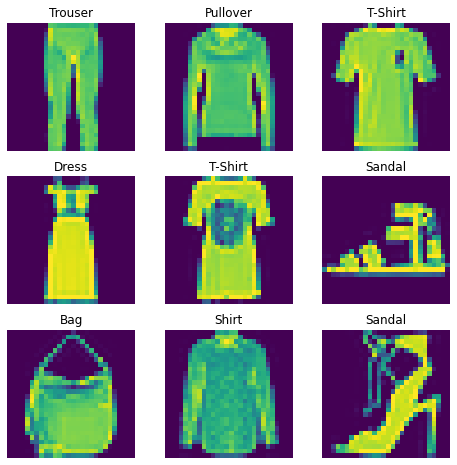

In [17]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols,rows = 3,3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

In [18]:
#custom dataset from files
#implement these three function
  #__init__
  #__len__
  #__getitem__

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    
    # runs once when the dataset in instantiated. Here we initialize directory containing images, annotations, and transforms
    def __init(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform      
    
    # gives number of samples in the dataset
    def __len(self):
        return len(self.img_labels)

    # returns the sample from dataset at the given index
    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label



In [19]:
from torch.utils.data import DataLoader

In [21]:
# prepare data for training with Dataloader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle = True)

Features batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


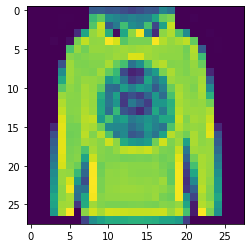

Label: 2


In [23]:
#now the dataset has been loaded to dataloader, and it can be iterated upon

train_features, train_labels = next(iter(train_dataloader))
print(f"Features batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")
